In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from keras import models
from keras import layers
import matplotlib.pyplot as plt

Verover de data. Het is een dataset van IMDB met filmrecensies. De labels zijn binair en geven aan of een film wel of geen aanrader is volgens de reviews.

In [2]:
from keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=10000,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=42,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

bekijk de geimporteerde data.

In [3]:
X_train[:1]

array([list([1, 11, 4079, 11, 4, 1986, 745, 3304, 299, 1206, 590, 3029, 1042, 37, 47, 27, 1269, 2, 7637, 19, 6, 3586, 15, 1367, 3196, 17, 1002, 723, 1768, 2887, 757, 46, 4, 232, 1131, 39, 107, 3589, 11, 4, 4539, 198, 24, 4, 1834, 133, 4, 107, 7, 98, 413, 8911, 5835, 11, 35, 781, 8, 169, 4, 2179, 5, 259, 334, 3773, 8, 4, 3497, 10, 10, 17, 16, 3381, 46, 34, 101, 612, 7, 84, 18, 49, 282, 167, 2, 7173, 122, 24, 1414, 8, 177, 4, 392, 531, 19, 259, 15, 934, 40, 507, 39, 2, 260, 77, 8, 162, 5097, 121, 4, 65, 304, 273, 13, 70, 1276, 2, 8, 15, 745, 3304, 5, 27, 322, 2197, 2, 2, 70, 30, 2, 88, 17, 6, 3029, 1042, 29, 100, 30, 4943, 50, 21, 18, 148, 15, 26, 5980, 12, 152, 157, 10, 10, 21, 19, 3196, 46, 50, 5, 4, 1636, 112, 828, 6, 1003, 4, 162, 5097, 2, 517, 6, 2, 7, 4, 9527, 5593, 4, 351, 232, 385, 125, 6, 1693, 39, 2383, 5, 29, 69, 5593, 5670, 6, 162, 5097, 1567, 232, 256, 34, 718, 5612, 2980, 8, 6, 226, 762, 7, 2, 7830, 5, 517, 2, 6, 3242, 7, 4, 351, 232, 37, 9, 1861, 8, 123, 3196, 2, 5612, 188

Zoals je kunt zien bevat `X_train` vectoren met getallen. Elke vector staat voor een review. Elk getal staat voor een woord.

Met onderstaande code kun je een vector met getallen terugvertalen naar woorden. Run deze code.

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in X_train[0]])
decoded_review

"? in panic in the streets richard widmark plays u s navy doctor who has his week ? interrupted with a corpse that contains plague as cop paul douglas properly points out the guy died from two bullets in the chest that's not the issue here the two of them become unwilling partners in an effort to find the killers and anyone else exposed to the disease br br as was pointed out by any number of people for some reason director ? kazan did not bother to cast the small parts with anyone that sounds like they're from ? having been to new orleans where the story takes place i can personally ? to that richard widmark and his wife barbara ? ? can be ? because as a navy doctor he could be assigned there but for those that are natives it doesn't work br br but with plague out there and the news being kept a secret the new orleans ? starts a ? of the city's underworld the dead guy came off a ship from europe and he had underworld connections a new orleans wise guy played by jack palance jumps to a

In de tekst zie je een aantal vraagtekens. Een vraagteken staat in dit geval voor 'onbekend woord'.

De input is in deze vorm lastig te verwerken voor een neuraal netwerk. De getallen zijn categorische labels. Daarom gebruiken we One-hot-encoding. Helaas kan de `OneHotEncoder` uit sklearn niet overweg met deze input. Daarom maken we de input handmatig geschikt voor het neurale netwerk.

In [5]:
def vectorize_sequences(sequences, dimension=10000):
    # Maak een matrix van de vorm (len(sequences), dimension) met nullen
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # zet de juiste waarden in results[i] op 1
    return results

In [6]:
X_train = vectorize_sequences(X_train)
X_test = vectorize_sequences(X_test)

y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

Controleer of het omzetten van de data goed gegaan is

In [7]:
print(X_train[:1])
print(y_train[:1])

[[0. 1. 1. ... 0. 0. 0.]]
[1.]


Maak een neuraal netwerk dat met deze data overweg kan.

In [8]:
model = models.Sequential()
#Input layer
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))

model.add(layers.Dense(10, activation = "relu"))
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(10, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))

#Output layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                500050    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 500,681
Trainable params: 500,681
Non-trainable params: 0
__________________________________________________

Kies een loss function en optimizer en compileer het netwerk. Bedenk hierbij goed welke het meest geschikt is voor het probleem dat je aan het oplossen bent en voor de vorm van de output.

In [9]:
model.compile(
 optimizer = "RMSProp",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

Split in train en validatieset

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.66, shuffle= True)

Train je model model met de gemaakte train- en validatieset. 

In [11]:
results = model.fit(
 X_train, y_train,
 epochs= 10,
 batch_size = 50,
 validation_data = (X_valid, y_valid)
)


Epoch 1/10
170/170 [==============================] - 3s 12ms/step - loss: 0.6005 - accuracy: 0.6507 - val_loss: 0.3385 - val_accuracy: 0.8746
Epoch 2/10
170/170 [==============================] - 1s 8ms/step - loss: 0.3148 - accuracy: 0.8714 - val_loss: 0.3096 - val_accuracy: 0.8803
Epoch 3/10
170/170 [==============================] - 1s 8ms/step - loss: 0.1978 - accuracy: 0.9321 - val_loss: 0.3513 - val_accuracy: 0.8748
Epoch 4/10
170/170 [==============================] - 1s 8ms/step - loss: 0.1402 - accuracy: 0.9540 - val_loss: 0.4254 - val_accuracy: 0.8770
Epoch 5/10
170/170 [==============================] - 1s 8ms/step - loss: 0.0926 - accuracy: 0.9744 - val_loss: 0.5601 - val_accuracy: 0.8741
Epoch 6/10
170/170 [==============================] - 1s 7ms/step - loss: 0.0572 - accuracy: 0.9872 - val_loss: 0.7198 - val_accuracy: 0.8708
Epoch 7/10
170/170 [==============================] - 1s 8ms/step - loss: 0.0403 - accuracy: 0.9905 - val_loss: 0.9100 - val_accuracy: 0.8681
Epoch

Plot een learning curve. Zet de accuraatheid uit tegen de epochs en maak onderscheid tussen de training en validatie data. Wat zou volgens dit figuur het optimale aantal epochs zijn?

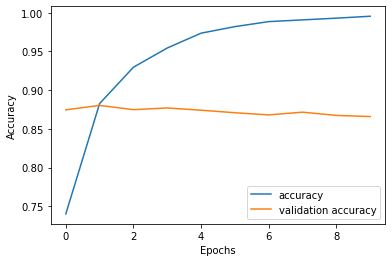

In [12]:
plt.plot(results.history['accuracy'], label="accuracy")
plt.plot(results.history['val_accuracy'], label="validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Plot een foutcurve. Zet de loss uit tegen de epochs en maak onderscheid tussen de training en validatie data. Bekijk of er misschien sprake is van overfitting/underfitting.

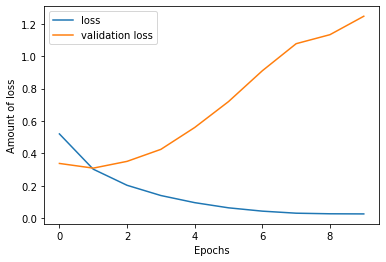

In [13]:
plt.plot(results.history['loss'], label="loss")
plt.plot(results.history['val_loss'], label="validation loss")
plt.xlabel("Epochs")
plt.ylabel("Amount of loss")
plt.legend()
plt.show()

Test je model

In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

782/782 [==============================] - 1s 1ms/step - loss: 1.3375 - accuracy: 0.8525
0.8525199890136719


Kijk wat er gebeurt met de foutcurves van de train en validatiedata en met de testscore als je verschillende netwerken maakt met verschillende instellingen (aantal lagen, aantal neuronen, optimizer).

Er zijn hele kleine veranderingen om meer consistenere data te krijgen is er meer data nodig en een kleinere stapgrootte. 

Bonusvraag: Zoek uit wat dropout lagen voor deep learning zijn en experimenteer met dropout lagen in jouw netwerk. Welke effect heeft dit op de resultaten?